# Task 2 - Landsat 8 false color image

## General instructions

First, update the following cell to have a link to your Homework 4 GitHub repository

https://github.com/saingersoll/eds220-hwk-4

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.

## Overview
The goal of this task is to create a false color image showing the fire scar of the Thomas fire in 2017. 
Read more about false color images here:
[NASA Earth Observatory - Why is that Forest Red and that Cloud Blue?
How to Interpret a False-Color Satellite Image](https://earthobservatory.nasa.gov/features/FalseColor)

## About the data

In this task you will use two datsets:

**First dataset**

A simplified collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmosperically corrected surface reflectance data, collected by the Landsat 8 satellite. 

Information about Landsat bands from USGS:

- [What are the band designations for the Landsat satellites?](https://www.usgs.gov/faqs/what-are-band-designations-landsat-satellites)

-[Common Landsat Band Combinations](https://www.usgs.gov/media/images/common-landsat-band-combinations)

-[How do I use a scale factor with Landsat Level-2 science products?](https://www.usgs.gov/faqs/how-do-i-use-a-scale-factor-landsat-level-2-science-products)


The data was accessed and pre-processed in the Microsoft Planetary Computer to remove data outside land and coarsen the spatial resolution ([Landsat Collection in MPC](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2)). Data should be used for visualization purposes only. 


**Second dataset**

A shapefile of fire perimeters in California during 2017. 
The [complete file can be accessed in the CA state geoportal](https://gis.data.ca.gov/datasets/CALFIRE-Forestry::california-fire-perimeters-all-1/about).

## File management
All your data files must be  inside a directory named 'data' **in your gitignore**. 

## Data access
All data is in the Canvas-week7-homework zip file.

## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now.

Text(0.5, 1.0, 'Areas Burned by Thomas Fire in Santa Barbara, CA (2017)')

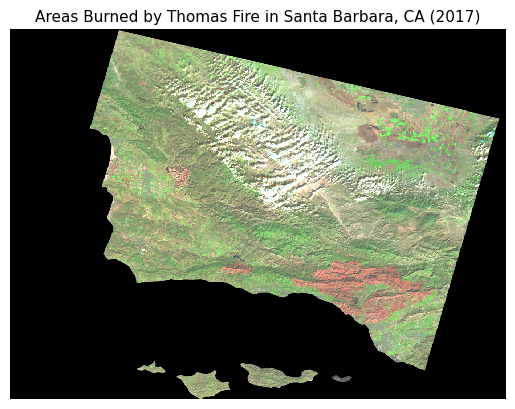

In [37]:
### ===== FINAL CODE =====
# Reading in libraries and functions
import os
import numpy as np
import pandas as pd

import geopandas as gpd
import xarray as xr
import rioxarray as rioxr
import rasterio
from shapely.geometry import Polygon

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#-----------------------------------
# Reading in the data
landsat = rioxr.open_rasterio(os.path.join(os.getcwd(), 'data','landsat8-2018-01-26-sb-simplified.nc')) 
ca = gpd.read_file('data/California_Fire_Perimeters/California_Fire_Perimeters_2017.shp')
#-----------------------------------
# Updating landsat data for plotting

# remove length 1 dimension (band)
landsat = landsat.squeeze()
# remove coordinates associated to band
landsat = landsat.drop('band')

# subsetting the bands for the false color image as an array
false_colors = landsat[['swir22','nir08','red']].to_array()
#------------------------------------
# Updating CA fire boundary data for plotting

# subsetting for the Thomas Fire
thomas_fire = ca[ca['FIRE_NAME'] == 'THOMAS']
# Update CRS to match and check
ca = ca.to_crs(landsat.rio.crs)
#------------------------------------
# Plotting the Thomas Fire burned areas of Santa Barbara
fig, ax = plt.subplots()               # creates figure for plotting
plt.axis('off')                        # removes plot axes

thomas_fire.plot(ax = ax,              # plots thomas fire burn area
       color = 'hotpink',              # color of burn area
       edgecolor = '0.7')              # opacity of edgecolor
false_colors.plot.imshow(ax = ax,      # plots false color bands  
                         robust = True)# includes colors 

# adds title
ax.set_title('Areas Burned by Thomas Fire in Santa Barbara, CA (2017)', fontsize=11)

## Import libraries and functions

In [2]:
# reading in libraries and functions
import os
import numpy as np
import pandas as pd

import geopandas as gpd
import xarray as xr
import rioxarray as rioxr
import rasterio
from shapely.geometry import Polygon

import matplotlib.pyplot as plt

## Import data

In [3]:
# reading in the data
landsat = rioxr.open_rasterio(os.path.join(os.getcwd(), 'data','landsat8-2018-01-26-sb-simplified.nc'))         # netcdf file

# confirming the dataset loaded properly
landsat

<xarray.Dataset>
Dimensions:      (y: 731, x: 870, band: 1)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0
Data variables:
    red          (band, y, x) float64 ...
    green        (band, y, x) float64 ...
    blue         (band, y, x) float64 ...
    nir08        (band, y, x) float64 ...
    swir22       (band, y, x) float64 ...

In [4]:
# reading in the data
ca = gpd.read_file('data/California_Fire_Perimeters/California_Fire_Perimeters_2017.shp')

# confirming the datasets loaded properly
ca.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   index       608 non-null    int64   
 1   OBJECTID    608 non-null    int64   
 2   YEAR_       608 non-null    object  
 3   STATE       608 non-null    object  
 4   AGENCY      608 non-null    object  
 5   UNIT_ID     608 non-null    object  
 6   FIRE_NAME   597 non-null    object  
 7   INC_NUM     608 non-null    object  
 8   ALARM_DATE  608 non-null    object  
 9   CONT_DATE   606 non-null    object  
 10  CAUSE       608 non-null    float64 
 11  C_METHOD    608 non-null    float64 
 12  OBJECTIVE   608 non-null    float64 
 13  GIS_ACRES   608 non-null    float64 
 14  COMMENTS    148 non-null    object  
 15  COMPLEX_NA  39 non-null     object  
 16  COMPLEX_IN  39 non-null     object  
 17  IRWINID     7 non-null      object  
 18  FIRE_NUM    40 non-null     object  
 19  

## Exploration 

Use the next cell(s) to perform relevant explorations of these datasets.

### `landsat` Geospatial Attributes

In [5]:
# check geospatial attributes
print('height: ', landsat.rio.height)
print('width: ', landsat.rio.width, '\n')

#print('spatial bounding box: ')
print(landsat.rio.bounds(), '\n')

height:  731
width:  870 

(121170.0, 3755160.0, 356070.0, 3952530.0) 



### CA Fire Perimeter Data Visualization 

(-13876168.545909999, -12781728.28669, 3772445.9344300027, 5231125.86197)

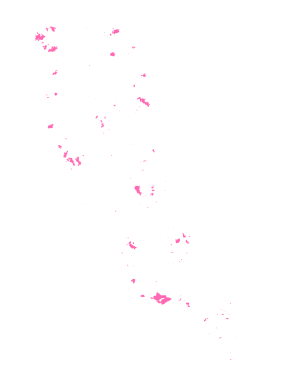

In [6]:
# confirming the dataset loaded properly by plot
fig, ax = plt.subplots()

ca.plot(ax = ax,
        color = 'hotpink')
plt.axis('off')

## Updates

If there are any updates needed to the data to plot the true and false color images, perform them in the next cells (you may add as many as you need). 
Comment appropriately.

### Cleaning the `landsat` dimensions

In [7]:
# original dimensions and coordinates show us that band is a dimension
print(landsat.dims, landsat.coords,'\n')

# remove length 1 dimension (band)
landsat = landsat.squeeze()
print(landsat.dims, landsat.coords,'\n')

# remove coordinates associated to band
landsat = landsat.drop('band')
print(landsat.dims, landsat.coords)

Frozen({'y': 731, 'x': 870, 'band': 1}) Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * band         (band) int64 1
    spatial_ref  int64 0 

Frozen({'y': 731, 'x': 870}) Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
    band         int64 1
    spatial_ref  int64 0 

Frozen({'y': 731, 'x': 870}) Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
  * x            (x) float64 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
    spatial_ref  int64 0


## True color image

Without creating any new variables:

Select the red, green and blue variables (in that order) of the `xarray.Dataset`, convert it to a `numpy.array` using the `to_array()` method, and then use `.plot.imshow()` to create an RGB image with the data. (There will be a warning)

In [8]:
# creating an array subset of the data for RGB landsat bands
landsat_array = landsat[['red','green','blue']].to_array()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


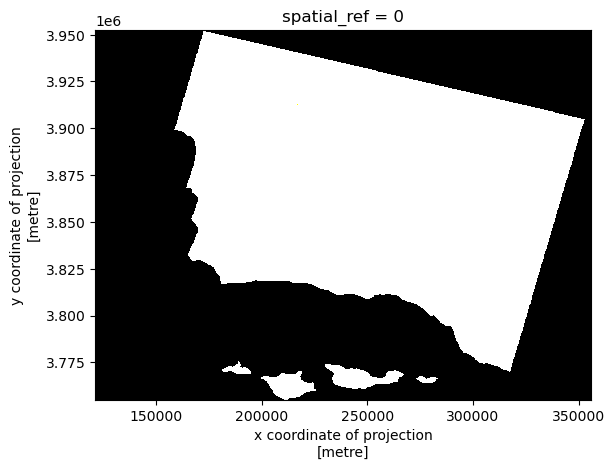

In [9]:
# Plotting true color landsat
size = 4                                       # fig size 
aspect = landsat.rio.width/landsat.rio.height  # aspect ratio of fig
fig, ax = plt.subplots()                       # creates fig for plotting

landsat_array.plot.imshow()                    # plots landsat array 

Adjust the scale used for plotting the bands to get a true color image. 
HINT: [Check the `robust` parameter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)
The issue here is the clouds: their RGB values are outliers and cause the other values to be squished when plotting. 

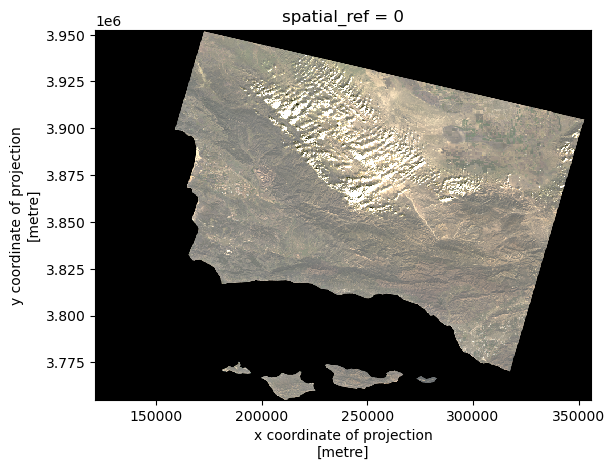

In [10]:
# Plotting true color landsat
size = 4
aspect = landsat.rio.width/landsat.rio.height
fig, ax = plt.subplots()

landsat_array.plot.imshow(robust = True)

## False color image
Without creating any new variables:

Create a false color image by plotting the short-wave infrared (swir22), near-infrared, and red variables (in that order).

In [11]:
# subsetting the bands for the false color image as an array
false_colors = landsat[['swir22','nir08','red']].to_array()

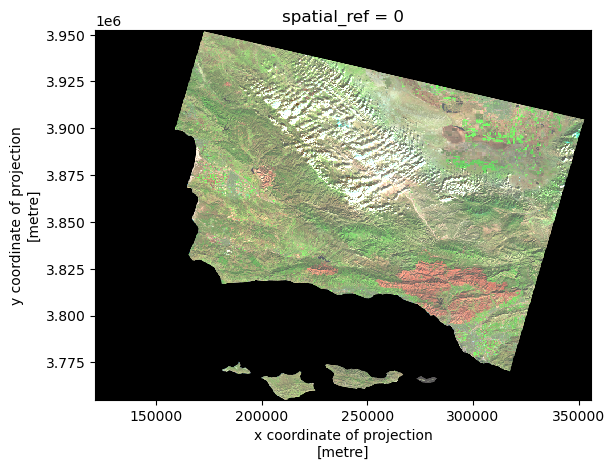

In [12]:
# Plotting true color landsat
fig, ax = plt.subplots()

false_colors.plot.imshow(robust = True)

## Updates

If there are any updates needed to the data to create the map, perform them in the next cells (you may add as many as you need). 
Comment appropriately.

In [13]:
# Inspecting CA burned areas and associated fires
ca['FIRE_NAME']

# uh oh, we're only interest in the Thomas fire, so let's filter for it and create a subset

0         BROOK
1       PACIFIC
2         GRADE
3      PACIFICA
4      MONTVIEW
         ...   
603     STUBBLE
604      HUDSON
605      HARKIN
606       JONES
607        LAKE
Name: FIRE_NAME, Length: 608, dtype: object

(-13327107.924660001, -13234480.23874, 4064034.260785, 4117135.1485149995)

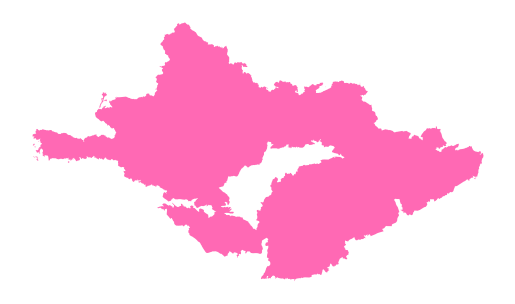

In [14]:
# subsetting for the Thomas Fire
thomas_fire = ca[ca['FIRE_NAME'] == 'THOMAS']

# visualize the subset to confirm it properly filtered
fig, ax = plt.subplots()

thomas_fire.plot(ax = ax,
        color = 'hotpink')
plt.axis('off')

In [15]:
# What are our data's CRS? Do they match for mapping? 
print('Landsat CRS: ', landsat.rio.crs)
print('CA Fire Boundary CRS: ', ca.crs)

Landsat CRS:  EPSG:32611
CA Fire Boundary CRS:  epsg:3857


In [16]:
# Update CRS to match and check
ca = ca.to_crs(landsat.rio.crs)
print('CA Fire Boundary CRS: ', ca.crs)

CA Fire Boundary CRS:  PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]


## Map

Create a map showing the shortwave infrared/nir/ ed false color image together with the Thomas fire perimeter. 
Customize it appropriately.

Text(0.5, 1.0, 'Areas Burned by Thomas Fire in Santa Barbara, CA (2017)')

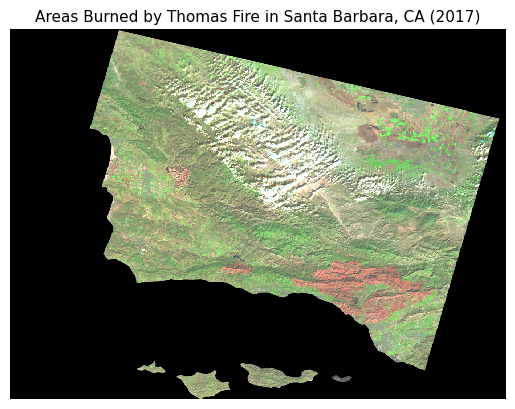

In [36]:
# Plotting the Thomas Fire burned areas of Santa Barbara
fig, ax = plt.subplots()               # creates figure for plotting
plt.axis('off')                        # removes plot axes

thomas_fire.plot(ax = ax,              # plots thomas fire burn area
       color = 'hotpink',              # color of burn area
       edgecolor = '0.7')              # opacity of edgecolor
false_colors.plot.imshow(ax = ax,      # plots false color bands  
                         robust = True)# includes colors 
# adds title
ax.set_title('Areas Burned by Thomas Fire in Santa Barbara, CA (2017)', fontsize = 11)

Text(0.5, 1.0, 'Areas Burned by Thomas Fire in Santa Barbara, CA (2017)')

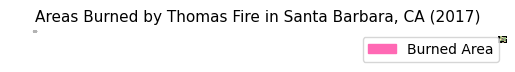

In [40]:
# Plotting the Thomas Fire burned areas of Santa Barbara
fig, ax = plt.subplots()               # creates figure for plotting
plt.axis('off')                        # removes plot axes
false_colors.plot.imshow(ax = ax,      # plots false color bands
                         robust = True)# includes colors
thomas_fire.plot(ax = ax,              # plots thomas fire burn area
       color = 'hotpink',              # color of burn area
       edgecolor = '0.7')              # opacity of edgecolor
#Add a figure legend
fire_scar = mpatches.Patch(color = 'hotpink', label = 'Burned Area')
ax.legend(handles=[fire_scar])
# adds title
ax.set_title('Areas Burned by Thomas Fire in Santa Barbara, CA (2017)', fontsize = 11)

### Saving Figure as a PNG

In [ ]:
fig.savefig('SB_Thomas_Fire.png')